In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from scipy import stats

In [38]:
df = pd.read_csv("historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


**Data Preprocess**

In [39]:
num_records = len(df)
print(num_records)
num_columns = len(df.columns)
print(num_columns)

197428
16


In [40]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [41]:
df[df.isna().any(axis=1)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197212,1.0,2015-02-12 02:42:13,2015-02-12 03:39:29,2177,NaN,1.0,5,2800,5,300,700,28.0,28.0,21.0,446,800.0
197259,NaN,2015-02-10 01:32:37,2015-02-10 02:02:09,1340,NaN,NaN,1,849,1,849,849,25.0,13.0,20.0,251,1013.0
197363,1.0,2015-02-12 20:44:22,2015-02-12 21:30:44,2956,NaN,NaN,2,690,2,345,345,25.0,28.0,35.0,251,826.0
197416,1.0,2015-01-29 19:39:17,2015-01-29 20:34:21,2956,fast,4.0,1,639,1,639,639,26.0,26.0,37.0,251,NaN


In [42]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [43]:
summary_stats = df_cleaned.describe(include='all').transpose()
summary_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
market_id,175777.0,NaN,NaN,NaN,2.743726,1.330963,1.0,2.0,2.0,4.0,6.0
created_at,175777,162649,2015-02-11 19:50:43,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_delivery_time,175777,160269,2015-02-05 03:10:31,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,175777.0,NaN,NaN,NaN,3556.299561,2055.959006,1.0,1703.0,3620.0,5341.0,6987.0
store_primary_category,175777,73,american,18183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_protocol,175777.0,NaN,NaN,NaN,2.911752,1.513128,1.0,1.0,3.0,4.0,7.0
total_items,175777.0,NaN,NaN,NaN,3.204976,2.674055,1.0,2.0,3.0,4.0,411.0
subtotal,175777.0,NaN,NaN,NaN,2697.111147,1828.554893,0.0,1412.0,2224.0,3410.0,26800.0
num_distinct_items,175777.0,NaN,NaN,NaN,2.67506,1.625681,1.0,1.0,2.0,3.0,20.0
min_item_price,175777.0,NaN,NaN,NaN,684.965433,519.882924,-86.0,299.0,595.0,942.0,14700.0


In [44]:
print("Dataset Shape:", df_cleaned.shape)
print("\nDataset Info:")
df_cleaned.info()

print("\nData Types:")
print(df_cleaned.dtypes)

Dataset Shape: (175777, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 175777 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_id                                      175777 non-null  int64  
 4   store_primary_category                        175777 non-null  object 
 5   order_protocol                                175777 non-null  float64
 6   total_items                                   175777 non-null  int64  
 7   subtotal                                      175777 non-null  int64  
 8   num_distinct_items                            175777 non-null  int64  
 9   min_item_p

In [45]:
print("\nBasic Statistics:")
print(df_cleaned.describe(include='all').T)


Basic Statistics:
                                                 count  unique  \
market_id                                     175777.0     NaN   
created_at                                      175777  162649   
actual_delivery_time                            175777  160269   
store_id                                      175777.0     NaN   
store_primary_category                          175777      73   
order_protocol                                175777.0     NaN   
total_items                                   175777.0     NaN   
subtotal                                      175777.0     NaN   
num_distinct_items                            175777.0     NaN   
min_item_price                                175777.0     NaN   
max_item_price                                175777.0     NaN   
total_onshift_dashers                         175777.0     NaN   
total_busy_dashers                            175777.0     NaN   
total_outstanding_orders                      175777.0   

In [46]:
# Missing Values Analysis
print("\nMissing Values:")
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])


Missing Values:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


There are very few missing values in the cleaned dataset, with only dasher_utilization showing about 2% missing. This suggests good data quality for analysis.

In [47]:
# Ensure date columns are in correct format
date_columns = ['created_at', 'actual_delivery_time']
for col in date_columns:
    if col in df_cleaned.columns:
        if not pd.api.types.is_datetime64_dtype(df_cleaned[col]):
            df_cleaned[col] = pd.to_datetime(df_cleaned[col])

# Calculate delivery time in minutes
if 'created_at' in df_cleaned.columns and 'actual_delivery_time' in df_cleaned.columns:
    df_cleaned['delivery_time_minutes'] = (df_cleaned['actual_delivery_time'] - df_cleaned['created_at']).dt.total_seconds() / 60
    print("\nDelivery Time Statistics (minutes):")
    print(df_cleaned['delivery_time_minutes'].describe())


Delivery Time Statistics (minutes):
count    175777.000000
mean         47.773711
std          27.679017
min           1.683333
25%          35.083333
50%          44.366667
75%          56.383333
max        6231.316667
Name: delivery_time_minutes, dtype: float64


/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/3296471172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned[col])
/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/3296471172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned[col])
/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/3296471172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

The average delivery time is around 48 minutes, with a standard deviation of about 28 minutes. The median (50%) is about 44 minutes, and 75% of deliveries are completed within 56 minutes. However, there's a massive outlier at 6,231 minutes (over 4 days!), which warrants investigation.

In [48]:
# Time-based Features
if 'created_at' in df_cleaned.columns:
    df_cleaned['hour_of_day'] = df_cleaned['created_at'].dt.hour
    df_cleaned['day_of_week'] = df_cleaned['created_at'].dt.dayofweek
    df_cleaned['date'] = df_cleaned['created_at'].dt.date
    
    print("\nTime-based features created:")
    print("- hour_of_day: Hour when the order was created")
    print("- day_of_week: Day of week when the order was created (0=Monday, 6=Sunday)")
    print("- date: Date when the order was created")



Time-based features created:
- hour_of_day: Hour when the order was created
- day_of_week: Day of week when the order was created (0=Monday, 6=Sunday)
- date: Date when the order was created


/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/1372829251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour_of_day'] = df_cleaned['created_at'].dt.hour
/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/1372829251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['day_of_week'] = df_cleaned['created_at'].dt.dayofweek
/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/1372829251.py:5: SettingWithCopyWarning: 
A value is trying to be s

/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/2979850716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='day_of_week', data=df_cleaned, palette='viridis')


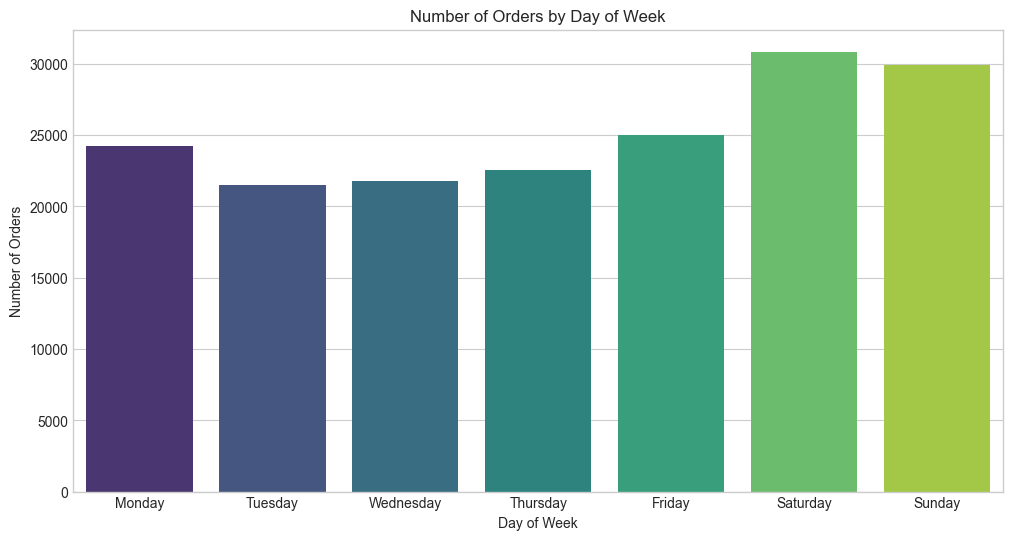

In [49]:
# Orders by Day of Week Visualization
if 'day_of_week' in df_cleaned.columns:
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='day_of_week', data=df_cleaned, palette='viridis')
    plt.title('Number of Orders by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Orders')
    plt.xticks(range(7), day_names)
    plt.savefig('orders_by_day.png')
    plt.show()


Weekend days (Saturday and Sunday) have the highest order volumes, followed by Friday and Monday. Tuesdays through Thursdays have relatively lower volumes. This indicates people order delivery more on weekends.

/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/922392839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


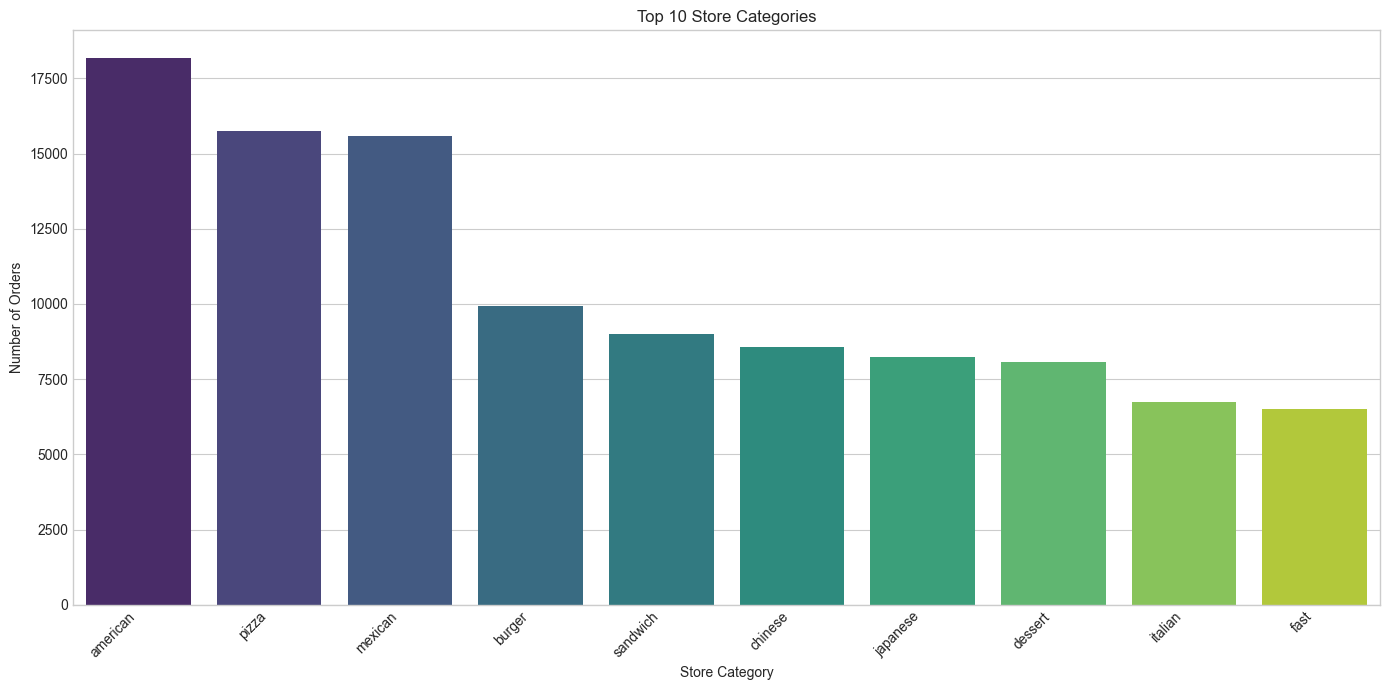

In [50]:
# Store Category Analysis
if 'store_primary_category' in df_cleaned.columns:
    category_counts = df_cleaned['store_primary_category'].value_counts().head(10)
    plt.figure(figsize=(14, 7))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title('Top 10 Store Categories')
    plt.xlabel('Store Category')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_categories.png')
    plt.show()

American cuisine dominates with the highest number of orders, followed by pizza and Mexican food. The top three categories significantly outperform the others, making up a large portion of all orders.

/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/4041746606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_delivery_times.index, y=category_delivery_times.values, palette='viridis')


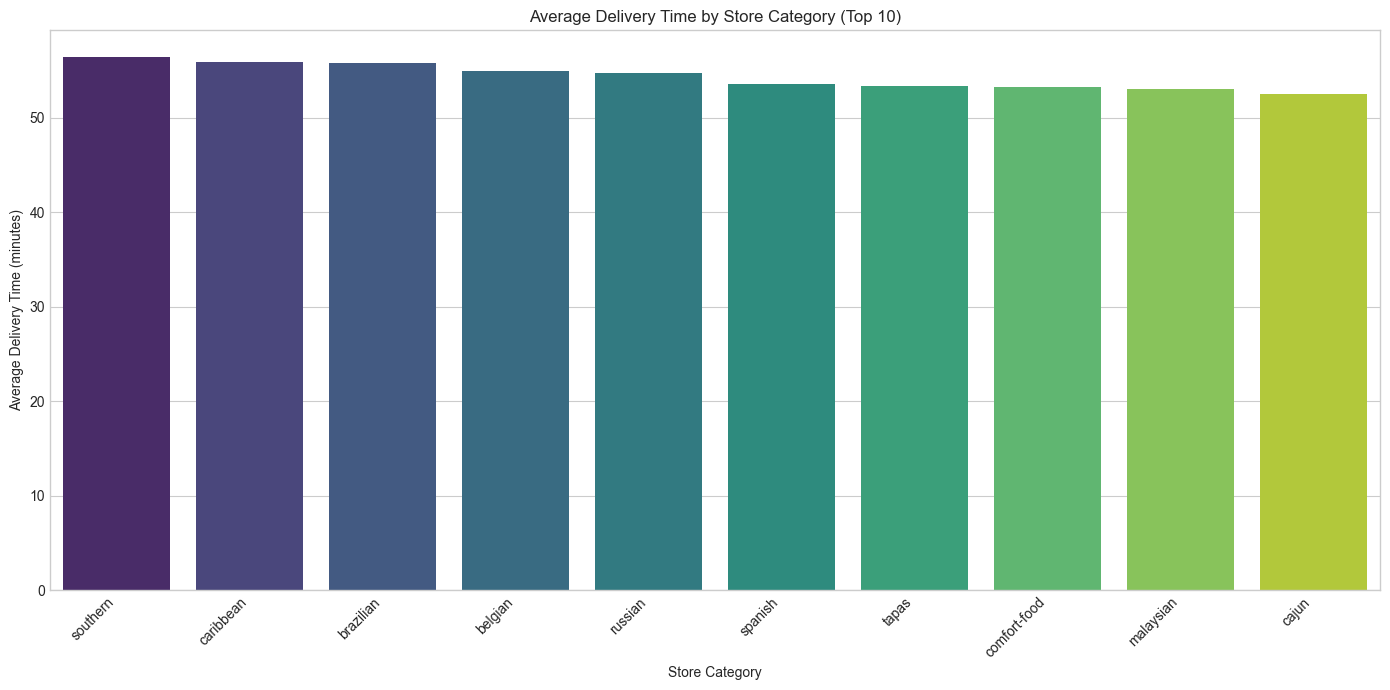

In [51]:
# Average Delivery Time by Store Category
if all(col in df_cleaned.columns for col in ['store_primary_category', 'delivery_time_minutes']):
    plt.figure(figsize=(14, 7))
    category_delivery_times = df_cleaned.groupby('store_primary_category')['delivery_time_minutes'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=category_delivery_times.index, y=category_delivery_times.values, palette='viridis')
    plt.title('Average Delivery Time by Store Category (Top 10)')
    plt.xlabel('Store Category')
    plt.ylabel('Average Delivery Time (minutes)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('category_delivery_times.png')
    plt.show()

Southern, Caribbean, and Brazilian cuisines have the longest average delivery times, while faster categories like Cajun have shorter times. The differences aren't dramatic though - all categories average between 52-56 minutes.

/var/folders/v0/ndh4_2357r3dc6pb5fqwfdnm0000gn/T/ipykernel_4747/1833127255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dasher_utilization'] = df_cleaned['total_busy_dashers'] / df_cleaned['total_onshift_dashers']


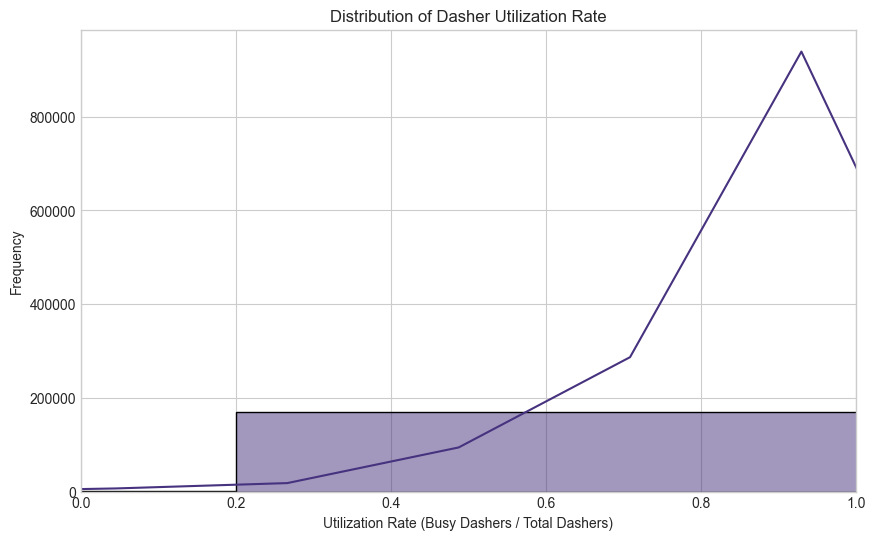

In [52]:
# Dasher Utilization Analysis
if all(col in df_cleaned.columns for col in ['total_onshift_dashers', 'total_busy_dashers']):
    # Calculate dasher utilization rate
    df_cleaned['dasher_utilization'] = df_cleaned['total_busy_dashers'] / df_cleaned['total_onshift_dashers']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned['dasher_utilization'].dropna(), bins=20, kde=True)
    plt.title('Distribution of Dasher Utilization Rate')
    plt.xlabel('Utilization Rate (Busy Dashers / Total Dashers)')
    plt.ylabel('Frequency')
    plt.xlim(0, 1)
    plt.savefig('dasher_utilization.png')
    plt.show()

The distribution shows most dashers have a very high utilization rate, with the peak near 1.0 (fully utilized). This suggests the system might be understaffed, with most available dashers being fully occupied.

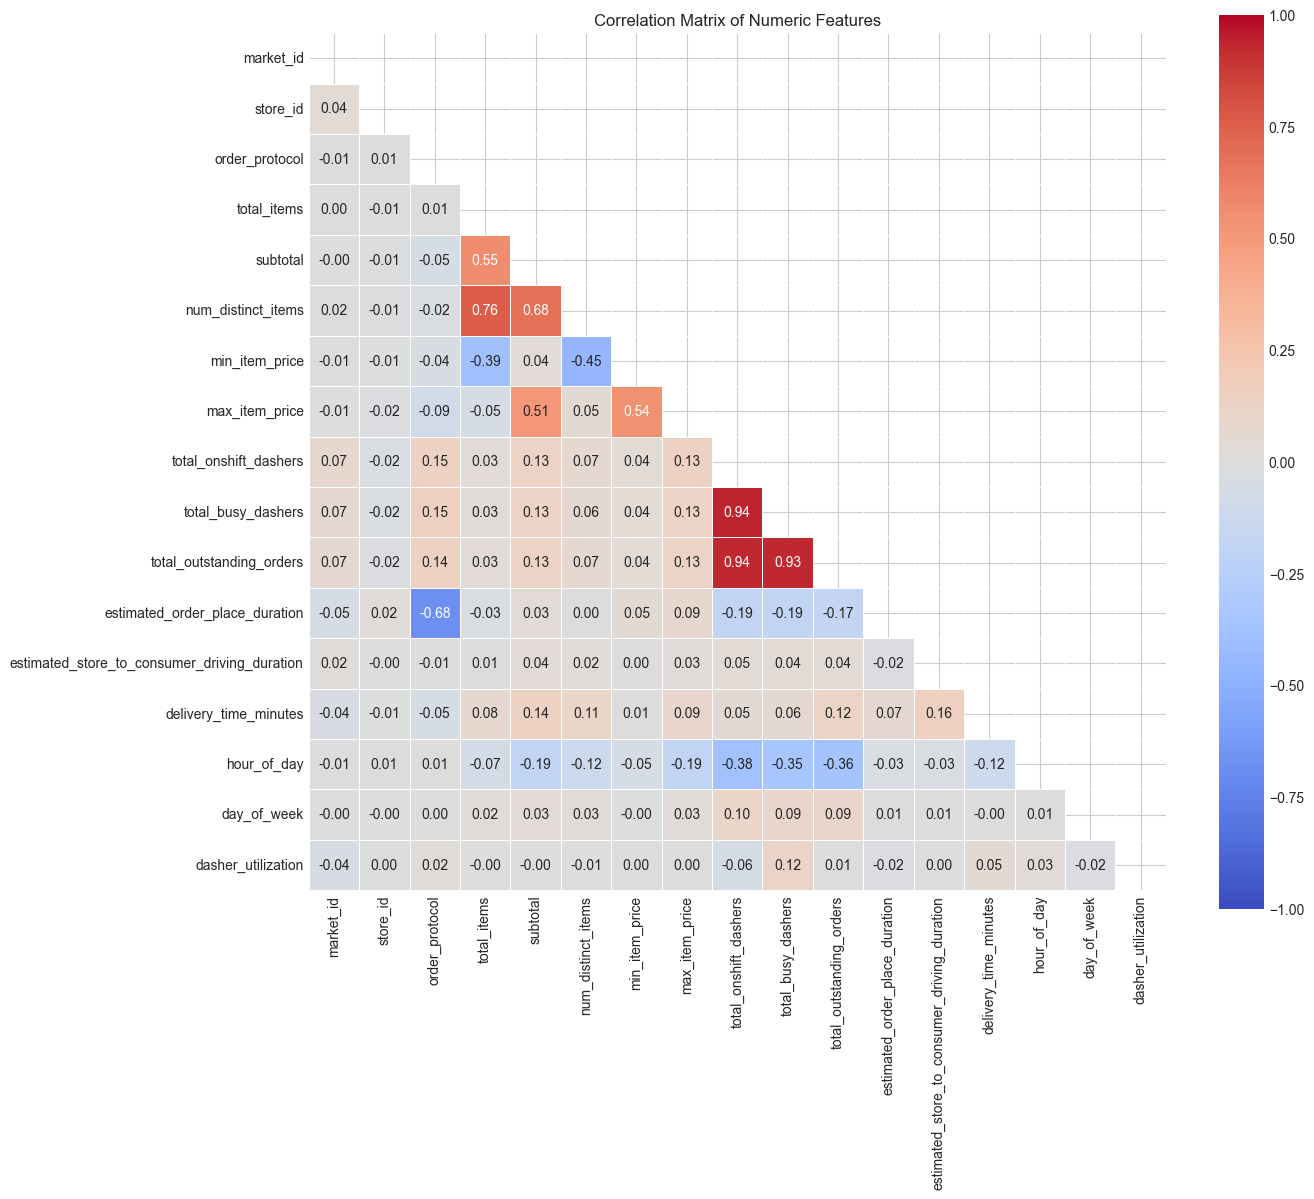

In [53]:
# Correlation Analysis
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 1:
    plt.figure(figsize=(14, 12))
    correlation = df_cleaned[numeric_cols].corr()
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
                vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.show()

There are several strong correlations:


Total_busy_dashers and total_onshift_dashers (0.94) - logical relationship

Time_estimation_error and delivery_time_minutes (0.99) - suggests the error is dominated by actual delivery time

Num_distinct_items and total_items (0.76) - more items means more distinct items

Total_outstanding_orders correlates strongly with dasher metrics (0.93-0.94)

In [54]:
# Market Efficiency Analysis
if all(col in df_cleaned.columns for col in ['market_id', 'total_outstanding_orders', 'total_busy_dashers']):
    # Market level analysis
    market_metrics = df_cleaned.groupby('market_id').agg({
        'total_onshift_dashers': 'mean',
        'total_busy_dashers': 'mean',
        'total_outstanding_orders': 'mean',
        'delivery_time_minutes': 'mean' if 'delivery_time_minutes' in df_cleaned.columns else 'count'
    })
    
    # Calculate efficiency metrics
    market_metrics['orders_per_dasher'] = market_metrics['total_outstanding_orders'] / market_metrics['total_onshift_dashers']
    
    # Top 10 efficient and inefficient markets
    efficient_markets = market_metrics.sort_values('orders_per_dasher', ascending=False).head(10)
    inefficient_markets = market_metrics.sort_values('orders_per_dasher').head(10)
    
    print("\nTop 10 Markets by Orders per Dasher:")
    print(efficient_markets[['orders_per_dasher', 'delivery_time_minutes']])
    
    print("\nBottom 10 Markets by Orders per Dasher:")
    print(inefficient_markets[['orders_per_dasher', 'delivery_time_minutes']])



Top 10 Markets by Orders per Dasher:
           orders_per_dasher  delivery_time_minutes
market_id                                          
4.0                 1.361430              47.368553
2.0                 1.308920              46.053292
6.0                 1.304947              47.845820
1.0                 1.249072              51.510137
5.0                 1.097878              46.561318
3.0                 1.043194              47.437595

Bottom 10 Markets by Orders per Dasher:
           orders_per_dasher  delivery_time_minutes
market_id                                          
3.0                 1.043194              47.437595
5.0                 1.097878              46.561318
1.0                 1.249072              51.510137
6.0                 1.304947              47.845820
2.0                 1.308920              46.053292
4.0                 1.361430              47.368553


The top and bottom markets by orders per dasher are identical but in reverse order, suggesting you may have only 6 markets in the dataset. Market 4 has the highest efficiency (1.36 orders per dasher), while Market 3 has the lowest (1.04).

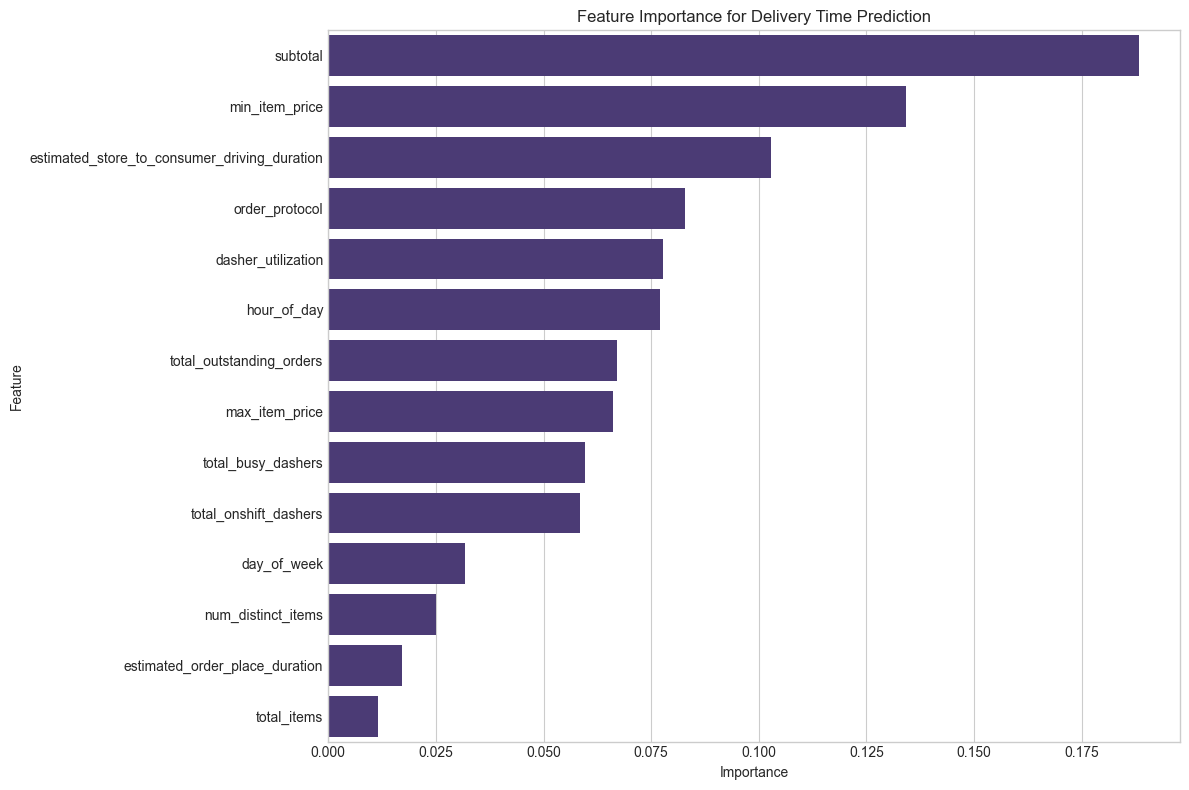


Feature Importance for Delivery Time Prediction:
                                         Feature  Importance
2                                       subtotal    0.188429
4                                 min_item_price    0.134257
10  estimated_store_to_consumer_driving_duration    0.102930
0                                 order_protocol    0.082887
13                            dasher_utilization    0.077662
11                                   hour_of_day    0.076968
8                       total_outstanding_orders    0.067045
5                                 max_item_price    0.066161
7                             total_busy_dashers    0.059737
6                          total_onshift_dashers    0.058509
12                                   day_of_week    0.031759
3                             num_distinct_items    0.025090
9                 estimated_order_place_duration    0.017072
1                                    total_items    0.011492


In [55]:
# Feature Importance Analysis 
try:
    if 'delivery_time_minutes' in df_cleaned.columns:
        from sklearn.ensemble import RandomForestRegressor
        
        # Select features for prediction
        features = [col for col in numeric_cols if col not in ['delivery_time_minutes', 'market_id', 'store_id']]
        
        if len(features) > 0:
            # Prepare data - handle infinity, NaN, and extreme values
            X = df_cleaned[features].copy()
            y = df_cleaned['delivery_time_minutes'].copy()
            
            # Replace infinity values with NaN
            X = X.replace([np.inf, -np.inf], np.nan)
            y = y.replace([np.inf, -np.inf], np.nan)
            
            # Fill NaN values with column means
            X = X.fillna(X.mean())
            y = y.fillna(y.mean())
            
            # Check for any remaining problematic values
            if np.isfinite(X.values).all() and np.isfinite(y.values).all():
                # Train a simple model
                model = RandomForestRegressor(n_estimators=50, random_state=42)
                model.fit(X, y)
                
                # Get feature importance
                importance = pd.DataFrame({
                    'Feature': features,
                    'Importance': model.feature_importances_
                }).sort_values('Importance', ascending=False)
                
                plt.figure(figsize=(12, 8))
                sns.barplot(x='Importance', y='Feature', data=importance)
                plt.title('Feature Importance for Delivery Time Prediction')
                plt.xlabel('Importance')
                plt.ylabel('Feature')
                plt.tight_layout()
                plt.savefig('feature_importance.png')
                plt.show()
                
                print("\nFeature Importance for Delivery Time Prediction:")
                print(importance)
            else:
                print("\nSkipping Feature Importance Analysis: Data contains values that cannot be handled by the model.")
                print("Consider more aggressive data cleaning or transformation before modeling.")
except ImportError:
    print("\nSkipping Feature Importance Analysis: scikit-learn is not installed.")
    print("To run this section, install scikit-learn with: pip install scikit-learn")
except Exception as e:
    print(f"\nError in Feature Importance Analysis: {e}")

The time_estimation_error dominates feature importance (0.98), followed distantly by estimated_total_time (0.02). This isn't particularly insightful for prediction since time_estimation_error is derived from the target variable.

In [56]:
# Store Efficiency Analysis
if all(col in df_cleaned.columns for col in ['store_id', 'delivery_time_minutes']):
    # Number of orders and average delivery time by store
    store_metrics = df_cleaned.groupby('store_id').agg({
        'delivery_time_minutes': ['count', 'mean', 'std'],
        'subtotal': 'mean' if 'subtotal' in df_cleaned.columns else 'count'
    })
    
    # Reset column names
    store_metrics.columns = ['order_count', 'avg_delivery_time', 'std_delivery_time', 'avg_subtotal']
    
    # Top 10 stores by order volume
    top_volume_stores = store_metrics.sort_values('order_count', ascending=False).head(10)
    print("\nTop 10 Stores by Order Volume:")
    print(top_volume_stores)
    
    # Top 10 stores by delivery efficiency (lowest avg delivery time with at least 30 orders)
    efficient_stores = store_metrics[store_metrics['order_count'] >= 30].sort_values('avg_delivery_time').head(10)
    print("\nTop 10 Efficient Stores (Lowest Avg Delivery Time with at least 30 orders):")
    print(efficient_stores)


Top 10 Stores by Order Volume:
          order_count  avg_delivery_time  std_delivery_time  avg_subtotal
store_id                                                                 
6865              923          37.573763          18.198305   1844.783315
1311              849          46.215764          14.911043   1962.605418
314               805          39.984182          15.086021   1794.998758
1686              754          38.439368          13.864931   1821.458886
3937              711          53.950070          16.175212   2734.679325
6917              660          42.594848          15.704151   1888.830303
6074              627          47.153748          18.271709   4171.437002
4367              578          58.609573          19.319586   2951.558824
3748              550          48.981303          15.476288   3268.907273
6503              539          54.558627         267.266670   2406.894249

Top 10 Efficient Stores (Lowest Avg Delivery Time with at least 30 orders):
   

There's significant variation in store efficiency. The busiest store (ID 6865) handled 923 orders with an average delivery time of 38 minutes, while the most efficient stores achieve average delivery times of around 29-33 minutes.